# || The Sparks Foundation || GRIPJAN21
## NAME: Gaurav Singh
## Task 5 : Implement a real time traffic sign classifier which identifies the traffic sign and gives an alert.
# Traffic Sign Classification and Recognition

### In this project we are detect German Traffic signs using keras(DEEP LEARNING) library.
### And in this project we are use German Traffic signs pickle file dataset.
#### [German Traffic signs pickle file dataset is here](https://bitbucket.org/jadslim/german-traffic-signs/src/master/) You can downloaded it here.


In [236]:
# download dataset repository
!git clone https://bitbucket.org/jadslim/german-traffic-signs

fatal: destination path 'german-traffic-signs' already exists and is not an empty directory.


In [237]:
!ls german-traffic-signs

signnames.csv  test.p  train.p	valid.p


In [238]:
# importing libaries
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import pickle
import pandas as pd
import random
import cv2

In [239]:
np.random.seed(0)

In [240]:
# import pickle dataset file
with open('german-traffic-signs/train.p', 'rb') as f:
  train_data = pickle.load(f)
with open('german-traffic-signs/valid.p', 'rb') as f:
  val_data = pickle.load(f)
with open('german-traffic-signs/test.p', 'rb') as f:
  test_data = pickle.load(f)
  
  
  
X_train , y_train = train_data['features'], train_data['labels']
X_val , y_val = val_data['features'], val_data['labels']
X_test , y_test = test_data['features'], test_data['labels']

In [241]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(34799, 32, 32, 3)
(4410, 32, 32, 3)
(12630, 32, 32, 3)


In [242]:
assert(X_train.shape[0] == y_train.shape[0]), "No. of Images is not equals to number of labels"
assert(X_val.shape[0] == y_val.shape[0]), "No. of Images is not equals to number of labels"
assert(X_test.shape[0] == y_test.shape[0]), "No. of Images is not equals to number of labels"

assert(X_train.shape[1:] == (32,32,3)), "The Dimesnsions of the images are not 32 x 32 x 3"
assert(X_val.shape[1:] == (32,32,3)), "The Dimesnsions of the images are not 32 x 32 x 3"
assert(X_test.shape[1:] == (32,32,3)), "The Dimesnsions of the images are not 32 x 32 x 3"

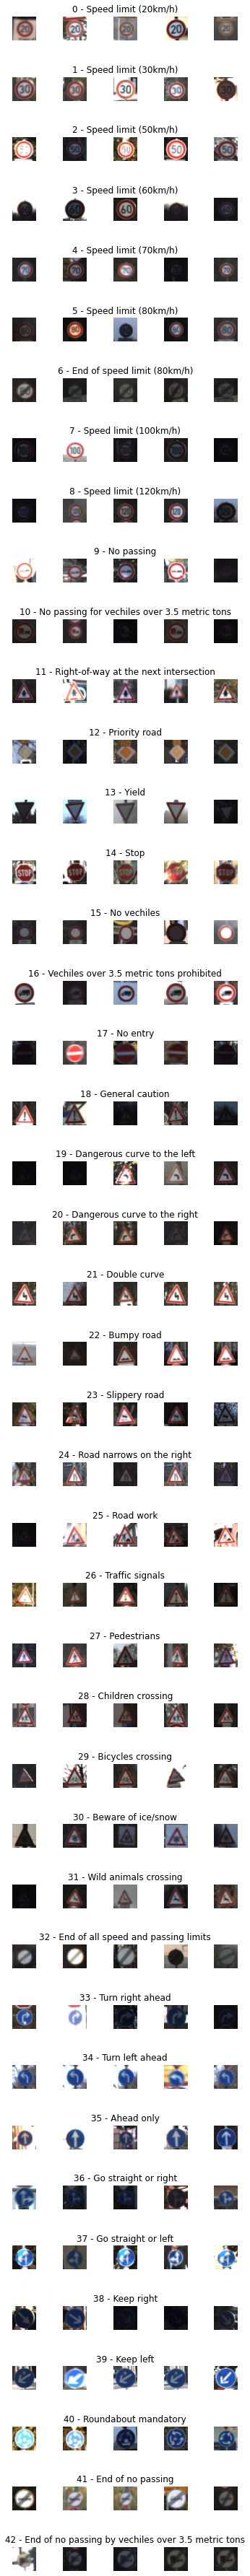

In [243]:
data = pd.read_csv('german-traffic-signs/signnames.csv')
#print(data)

num_of_samples=[]

cols = 5
num_classes = 43

fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,50))
fig.tight_layout()

for i in range(cols):
    for j, row in data.iterrows():
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
        axs[j][i].axis("off")
        if i == 2:
          axs[j][i].set_title(str(j) + " - " + row["SignName"])
          num_of_samples.append(len(x_selected))

[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


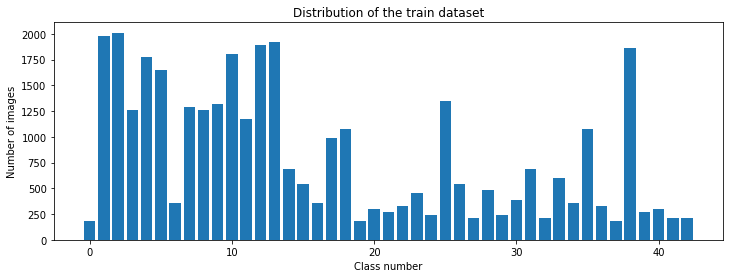

In [244]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

(32, 32, 3)
1


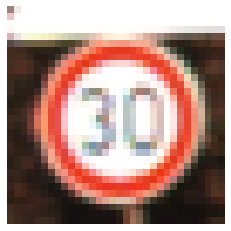

In [245]:
plt.imshow(X_train[3000])
plt.axis("off")
print(X_train[3000].shape)
print(y_train[3000])

(32, 32)


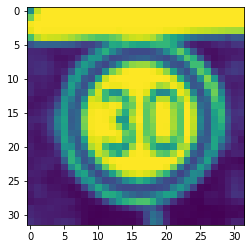

In [246]:
def grayscale(img):
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  return img

img = grayscale(X_train[3000])
plt.imshow(img)
#plt.axis("off")
print(img.shape)

(32, 32)


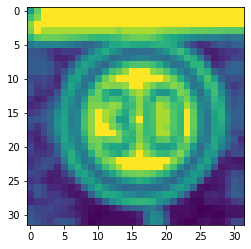

In [247]:
def equalize(img):
  img = cv2.equalizeHist(img)
  return img


img = equalize(img)
plt.imshow(img)
print(img.shape)

In [248]:
def preprocessing(img):
  img = grayscale(img)
  img = equalize(img)
  #normalize the images, i.e. convert the pixel values to fit btwn 0 and 1
  img = img/255
  return img

In [249]:
X_train = np.array(list(map(preprocessing, X_train)))
X_val = np.array(list(map(preprocessing, X_val)))
X_test = np.array(list(map(preprocessing, X_test)))

(34799, 32, 32)


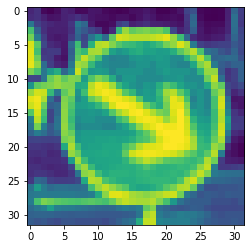

In [250]:
plt.imshow(X_train[random.randint(0, len(X_train) - 1)])
print(X_train.shape)

In [251]:
X_train = X_train.reshape(34799, 32, 32, 1)
X_val = X_val.reshape(4410, 32, 32, 1)
X_test = X_test.reshape(12630, 32, 32, 1)

In [252]:
from keras.preprocessing.image import ImageDataGenerator

# data Aug
datagen = ImageDataGenerator(width_shift_range=0.1,
                             height_shift_range=0.1,
                            zoom_range=0.2,
                            shear_range=0.1,
                            rotation_range=10.)

datagen.fit(X_train)

(15, 32, 32, 1)


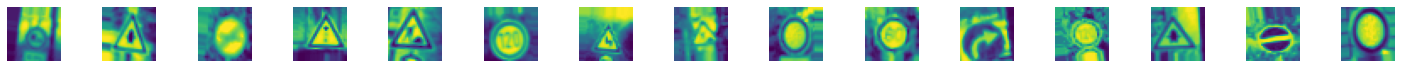

In [253]:
batches = datagen.flow(X_train, y_train, batch_size = 15)
X_batch, y_batch = next(batches)

fig, axs = plt.subplots(1, 15, figsize=(20, 5))
fig.tight_layout()

for i in range(15):
    axs[i].imshow(X_batch[i].reshape(32, 32))
    axs[i].axis("off")

print(X_batch.shape)

In [254]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(34799, 32, 32, 1)
(4410, 32, 32, 1)
(12630, 32, 32, 1)


In [255]:
y_train = to_categorical(y_train, 43)
y_val = to_categorical(y_val, 43)
y_test = to_categorical(y_test, 43)

In [256]:
def better_model():
  model = Sequential()
  # add the convolutional layer
  #filters, size of filters,input_shape,activation_function
  model.add(Conv2D(60,(5,5), input_shape= (32,32,1), activation = 'relu'))
  model.add(Conv2D(60,(5,5), input_shape= (32,32,1), activation = 'relu'))
  #pooling layer
  model.add(MaxPooling2D(pool_size = (2,2)))
  # add another convolutional layer
  model.add(Conv2D(30, (3, 3) , activation = 'relu'))
  model.add(Conv2D(30, (3, 3) , activation = 'relu'))
  # pooling layer
  model.add(MaxPooling2D(pool_size = (2,2)))
  
  #model.add(Dropout(0.5))
  
  #Flatten the image to 1 dimensional array
  model.add(Flatten())
  #add a dense layer : amount of nodes, activation
  model.add(Dense(500, activation = 'relu'))
  # place a dropout layer
  #0.5 drop out rate is recommended, half input nodes will be dropped at each update
  model.add(Dropout(0.5))
  # defining the ouput layer of our network
  model.add(Dense(num_classes, activation = 'softmax'))
  
  
  #Compile Model
  # we use Adam optimizer with a learning rate 0f 0.01
  # A categorical_crossentropy'
  
  model.compile(Adam(lr = 0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])
  
  return model

In [257]:
model = better_model()
#print a summary of the model
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 28, 28, 60)        1560      
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 24, 24, 60)        90060     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 12, 12, 60)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 10, 10, 30)        16230     
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 8, 8, 30)          8130      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 4, 4, 30)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 480)              

In [258]:
batch_size=100
steps_per_epoch = X_train.shape[0]//batch_size

In [259]:
# define our training paramters
history = model.fit(datagen.flow(X_train, y_train, batch_size=batch_size),
                            steps_per_epoch=steps_per_epoch,
                            epochs=5,
                            validation_data=(X_val, y_val), shuffle = 1)

Epoch 1/5
347/347 [==============================] - 11s 30ms/step - loss: 2.8966 - accuracy: 0.2146 - val_loss: 0.4637 - val_accuracy: 0.8653
Epoch 2/5
347/347 [==============================] - 10s 30ms/step - loss: 0.8667 - accuracy: 0.7337 - val_loss: 0.1835 - val_accuracy: 0.9397
Epoch 3/5
347/347 [==============================] - 10s 30ms/step - loss: 0.4873 - accuracy: 0.8534 - val_loss: 0.1240 - val_accuracy: 0.9610
Epoch 4/5
347/347 [==============================] - 10s 30ms/step - loss: 0.3453 - accuracy: 0.8934 - val_loss: 0.1121 - val_accuracy: 0.9653
Epoch 5/5
347/347 [==============================] - 11s 30ms/step - loss: 0.2643 - accuracy: 0.9173 - val_loss: 0.0858 - val_accuracy: 0.9737


Text(0.5, 0, 'epoch')

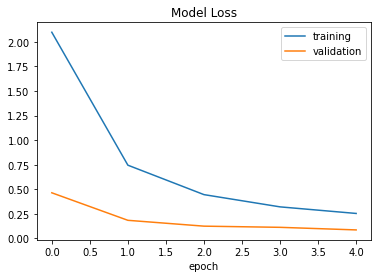

In [260]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Model Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

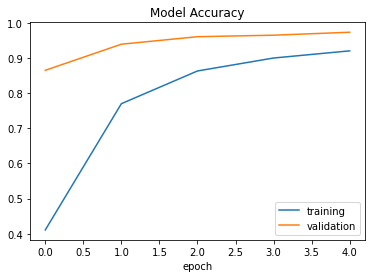

In [261]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'])
plt.title('Model Accuracy')
plt.xlabel('epoch')

In [262]:
score = model.evaluate(X_test, y_test , verbose = 0)
print("The test score is: ",score[0])
print("The Accuracy score is: ",score[1])

The test score is:  0.1439986228942871
The Accuracy score is:  0.9582739472389221


In [263]:
# save model
model.save("traffic model.h5")

In [264]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [265]:
'''ClassId,SignName
0,Speed limit (20km/h)
1,Speed limit (30km/h)
2,Speed limit (50km/h)
3,Speed limit (60km/h)
4,Speed limit (70km/h)
5,Speed limit (80km/h)
6,End of speed limit (80km/h)
7,Speed limit (100km/h)
8,Speed limit (120km/h)
9,No passing
10,No passing for vehicles over 3.5 metric tons
11,Right-of-way at the next intersection
12,Priority road
13,Yield
14,Stop
15,No vehicles
16,Vehicles over 3.5 metric tons prohibited
17,No entry
18,General caution
19,Dangerous curve to the left
20,Dangerous curve to the right
21,Double curve
22,Bumpy road
23,Slippery road
24,Road narrows on the right
25,Road work
26,Traffic signals
27,Pedestrians
28,Children crossing
29,Bicycles crossing
30,Beware of ice/snow
31,Wild animals crossing
32,End of all speed and passing limits
33,Turn right ahead
34,Turn left ahead
35,Ahead only
36,Go straight or right
37,Go straight or left
38,Keep right
39,Keep left
40,Roundabout mandatory
41,End of no passing
42,End of no passing by vehicles over 3.5 metric tons'''

'ClassId,SignName\n0,Speed limit (20km/h)\n1,Speed limit (30km/h)\n2,Speed limit (50km/h)\n3,Speed limit (60km/h)\n4,Speed limit (70km/h)\n5,Speed limit (80km/h)\n6,End of speed limit (80km/h)\n7,Speed limit (100km/h)\n8,Speed limit (120km/h)\n9,No passing\n10,No passing for vehicles over 3.5 metric tons\n11,Right-of-way at the next intersection\n12,Priority road\n13,Yield\n14,Stop\n15,No vehicles\n16,Vehicles over 3.5 metric tons prohibited\n17,No entry\n18,General caution\n19,Dangerous curve to the left\n20,Dangerous curve to the right\n21,Double curve\n22,Bumpy road\n23,Slippery road\n24,Road narrows on the right\n25,Road work\n26,Traffic signals\n27,Pedestrians\n28,Children crossing\n29,Bicycles crossing\n30,Beware of ice/snow\n31,Wild animals crossing\n32,End of all speed and passing limits\n33,Turn right ahead\n34,Turn left ahead\n35,Ahead only\n36,Go straight or right\n37,Go straight or left\n38,Keep right\n39,Keep left\n40,Roundabout mandatory\n41,End of no passing\n42,End of n

# Testing

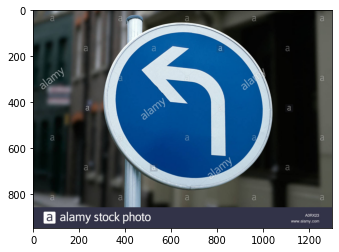

In [282]:
#fetch image

import requests
from PIL import Image
url = 'https://c8.alamy.com/comp/A0RX23/cars-and-automobiles-must-turn-left-ahead-sign-A0RX23.jpg'
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

(32, 32)


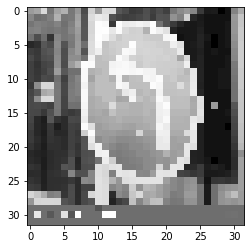

In [283]:
#Preprocess image

img = np.asarray(img)
img = cv2.resize(img, (32, 32))
img = preprocessing(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))
print(img.shape)

In [284]:
#Reshape reshape

img = img.reshape(1, 32, 32, 1)

In [285]:
#Test image
print("The Predicted Sign: "+str(np.argmax(model.predict(img), axis=-1)))

The Predicted Sign: [34]


In [286]:
from keras.models import load_model

model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'
del model # deletes the existing model

In [287]:
# returns a compiled model
# identical to the previous one
model = load_model('my_model.h5')

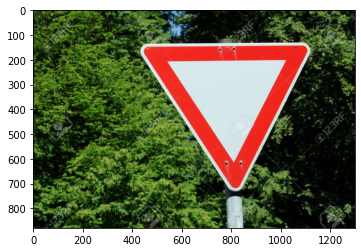

In [288]:
#Testing the Saved Model

#fetch image

import requests
from PIL import Image
url = 'https://previews.123rf.com/images/pejo/pejo0907/pejo090700003/5155701-german-traffic-sign-no-205-give-way.jpg'
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

(32, 32)


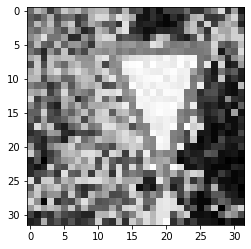

In [289]:
#Preprocess image

img = np.asarray(img)
img = cv2.resize(img, (32, 32))
img = preprocessing(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))
print(img.shape)

In [290]:
#Reshape reshape

img = img.reshape(1, 32, 32, 1)

In [291]:
#Test image
print("The Predicted Sign: "+str(np.argmax(model.predict(img), axis=-1)))

The Predicted Sign: [13]


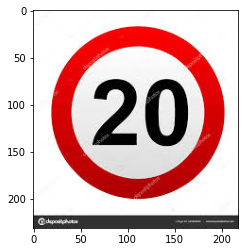

In [292]:
#Testing the Saved Model

#fetch image

import requests
from PIL import Image
url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQAsQqZfuSKrMLh0u1TS2hplSnqG1UFgLjuIg&usqp=CAU'
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

(32, 32)


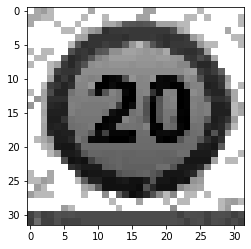

In [293]:
#Preprocess image

img = np.asarray(img)
img = cv2.resize(img, (32, 32))
img = preprocessing(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))
print(img.shape)

In [294]:
#Reshape reshape

img = img.reshape(1, 32, 32, 1)

In [295]:
#Test image
print("The Predicted Sign: "+str(np.argmax(model.predict(img), axis=-1)))

The Predicted Sign: [0]


# Thank You